In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
test_path = "C:/Users\\lenovo\\Desktop\\Demand_Analysis_Model\\data\\raw\\test.csv"

test = pd.read_csv(test_path)

print("Test shape:", test.shape)

print("\nTest head:")
print(test.head())

print("\nTest dtypes:")
print(test.dtypes)

Test shape: (45000, 4)

Test head:
   id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1

Test dtypes:
id        int64
date     object
store     int64
item      int64
dtype: object


In [14]:
print("\nTest describe (numeric columns):")
print(test.describe())

print("\nMissing values in test:")
print(test.isnull().sum())


Test describe (numeric columns):
                 id         store         item
count  45000.000000  45000.000000  45000.00000
mean   22499.500000      5.500000     25.50000
std    12990.525394      2.872313     14.43103
min        0.000000      1.000000      1.00000
25%    11249.750000      3.000000     13.00000
50%    22499.500000      5.500000     25.50000
75%    33749.250000      8.000000     38.00000
max    44999.000000     10.000000     50.00000

Missing values in test:
id       0
date     0
store    0
item     0
dtype: int64


In [15]:
test["date"] = pd.to_datetime(test["date"])

print("\nDate range in test:")
print("From:", test["date"].min())
print("To  :", test["date"].max())


Date range in test:
From: 2018-01-01 00:00:00
To  : 2018-03-31 00:00:00


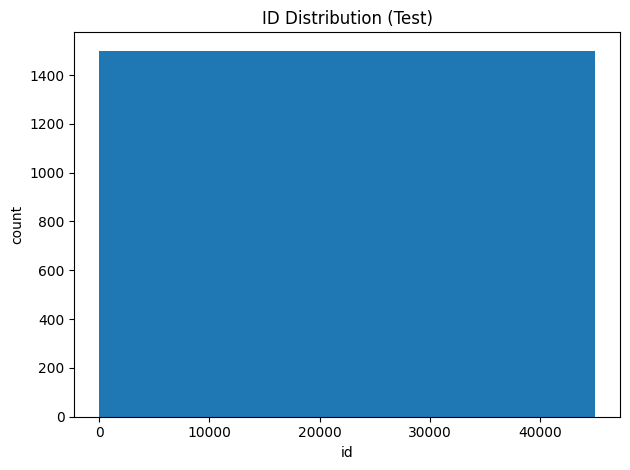

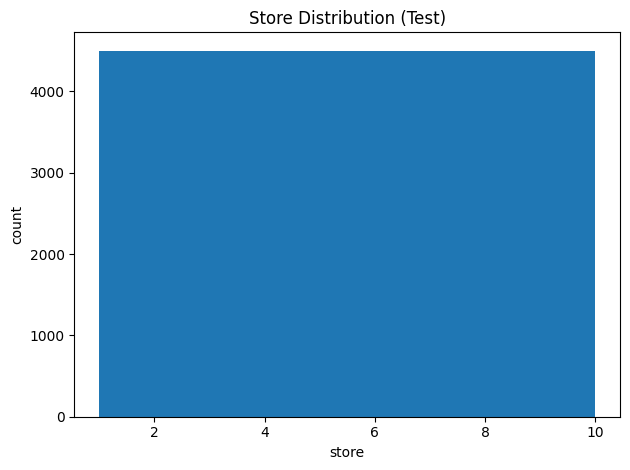

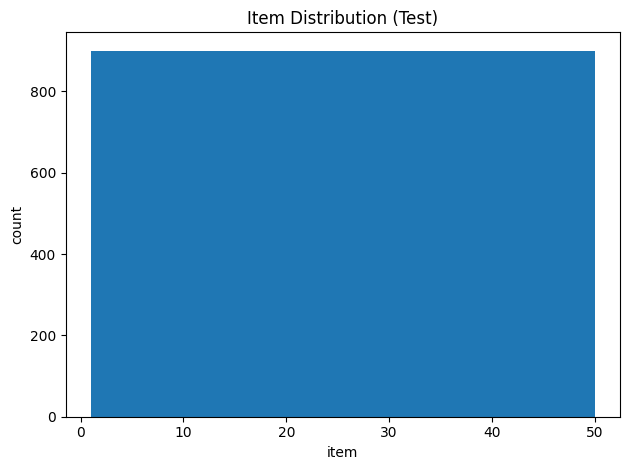


Unique stores in test: 10
Store values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Unique items in test: 50
Item sample: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20)] ...


In [16]:
# توزيع الـ id
plt.figure()
plt.hist(test["id"], bins=30)
plt.title("ID Distribution (Test)")
plt.xlabel("id")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# توزيع عدد المتاجر
plt.figure()
plt.hist(test["store"], bins=test["store"].nunique())
plt.title("Store Distribution (Test)")
plt.xlabel("store")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# توزيع عدد الأصناف
plt.figure()
plt.hist(test["item"], bins=test["item"].nunique())
plt.title("Item Distribution (Test)")
plt.xlabel("item")
plt.ylabel("count")
plt.tight_layout()
plt.show()

print("\nUnique stores in test:", test["store"].nunique())
print("Store values:", sorted(test["store"].unique()))

print("\nUnique items in test:", test["item"].nunique())
print("Item sample:", sorted(test["item"].unique())[:20], "...")

In [17]:
test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["dayofweek"] = test["date"].dt.dayofweek

print("\nTest with date features head:")
print(test.head())


Test with date features head:
   id       date  store  item  year  month  day  dayofweek
0   0 2018-01-01      1     1  2018      1    1          0
1   1 2018-01-02      1     1  2018      1    2          1
2   2 2018-01-03      1     1  2018      1    3          2
3   3 2018-01-04      1     1  2018      1    4          3
4   4 2018-01-05      1     1  2018      1    5          4


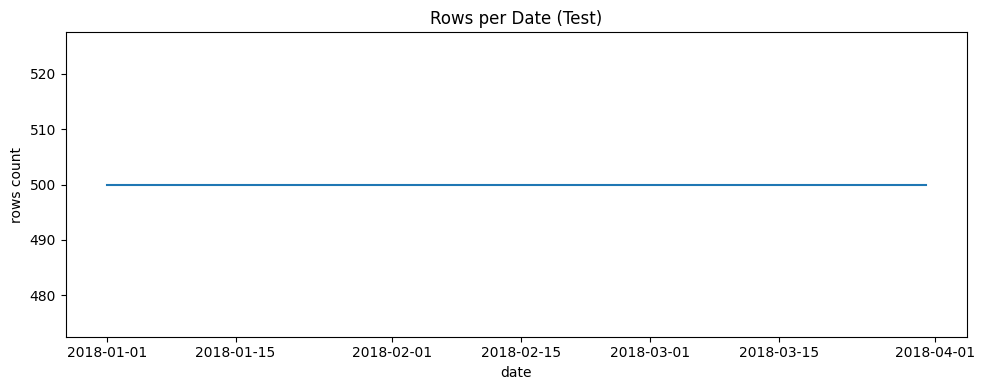


Rows per date summary:
count     90.0
mean     500.0
std        0.0
min      500.0
25%      500.0
50%      500.0
75%      500.0
max      500.0
Name: rows, dtype: float64


In [18]:
rows_per_date = test.groupby("date")["id"].count().reset_index(name="rows")

plt.figure(figsize=(10, 4))
plt.plot(rows_per_date["date"], rows_per_date["rows"])
plt.title("Rows per Date (Test)")
plt.xlabel("date")
plt.ylabel("rows count")
plt.tight_layout()
plt.show()

print("\nRows per date summary:")
print(rows_per_date["rows"].describe())

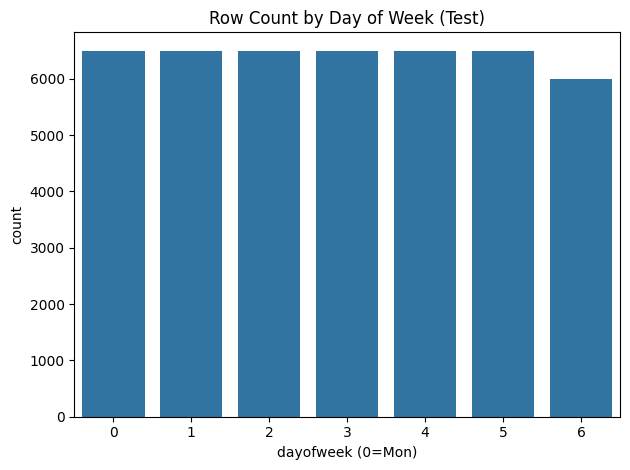

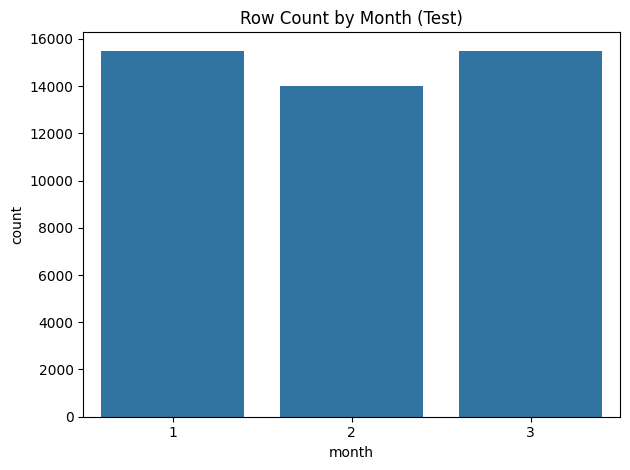

In [19]:
dow_counts = test["dayofweek"].value_counts().sort_index().reset_index()
dow_counts.columns = ["dayofweek", "count"]

plt.figure()
sns.barplot(data=dow_counts, x="dayofweek", y="count")
plt.title("Row Count by Day of Week (Test)")
plt.xlabel("dayofweek (0=Mon)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

month_counts = test["month"].value_counts().sort_index().reset_index()
month_counts.columns = ["month", "count"]

plt.figure()
sns.barplot(data=month_counts, x="month", y="count")
plt.title("Row Count by Month (Test)")
plt.xlabel("month")
plt.ylabel("count")
#plt.tight.tight_layout = True
plt.tight_layout()
plt.show()

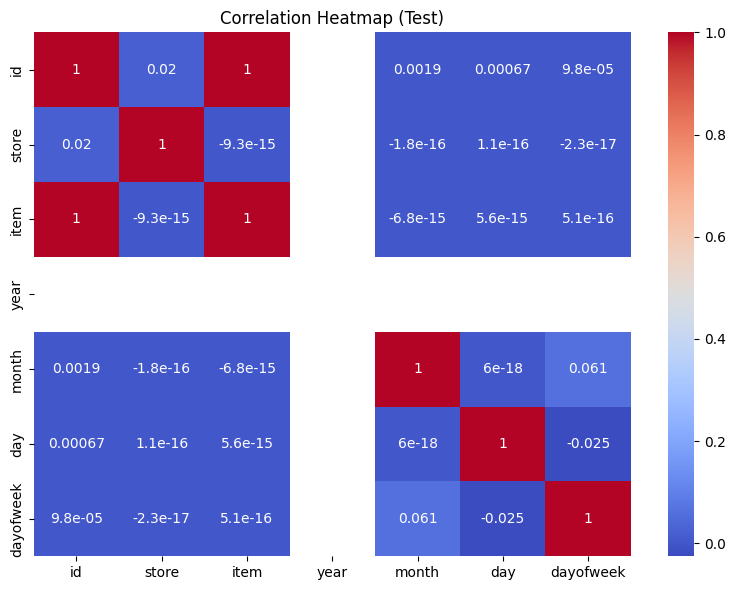


Correlation matrix (test numeric features):
                 id         store          item  year         month  \
id         1.000000  1.989975e-02  9.998000e-01   NaN  1.884841e-03   
store      0.019900  1.000000e+00 -9.263162e-15   NaN -1.849729e-16   
item       0.999800 -9.263162e-15  1.000000e+00   NaN -6.778819e-15   
year            NaN           NaN           NaN   NaN           NaN   
month      0.001885 -1.849729e-16 -6.778819e-15   NaN  1.000000e+00   
day        0.000666  1.094456e-16  5.603468e-15   NaN  5.983453e-18   
dayofweek  0.000098 -2.294951e-17  5.087239e-16   NaN  6.067275e-02   

                    day     dayofweek  
id         6.663642e-04  9.799079e-05  
store      1.094456e-16 -2.294951e-17  
item       5.603468e-15  5.087239e-16  
year                NaN           NaN  
month      5.983453e-18  6.067275e-02  
day        1.000000e+00 -2.530580e-02  
dayofweek -2.530580e-02  1.000000e+00  


In [20]:
num_cols_test = ["id", "store", "item", "year", "month", "day", "dayofweek"]
corr_test = test[num_cols_test].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_test, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Test)")
plt.tight_layout()
plt.show()

print("\nCorrelation matrix (test numeric features):")
print(corr_test)

In [21]:
feature_cols = [
    "store",
    "item",
    "year",
    "month",
    "day",
    "dayofweek",
]

test_ids = test["id"].values
X_test = test[feature_cols].values

print("\nFinal shapes for test only:")
print("X_test:", X_test.shape)
print("test_ids:", test_ids.shape)


Final shapes for test only:
X_test: (45000, 6)
test_ids: (45000,)
